In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from sklearn.cluster import KMeans
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D


In [2]:
customers = pd.read_csv('olist_customers_dataset.csv')
itens = pd.read_csv('olist_order_items_dataset.csv')
payments = pd.read_csv('olist_order_payments_dataset.csv')
reviews = pd.read_csv('olist_order_reviews_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')

In [3]:
customers_orders = pd.merge(customers, orders, on='customer_id')

In [4]:
cols = ['customer_id','customer_city','customer_state','order_id']
custmers_orders = customers_orders[cols]

In [5]:
customers_itens = pd.merge(customers_orders, itens, on='order_id')

In [6]:
customers_itens = customers_itens.drop(columns='order_item_id')

In [7]:
customers_products = pd.merge(customers_itens, products, on='product_id')

In [8]:
customers_products = customers_products.drop(columns=['product_name_lenght','product_description_lenght','product_photos_qty'])


In [9]:
customers_products_payments = pd.merge(customers_products, payments, on='order_id')

In [10]:
customers_products_payments = customers_products_payments.drop(columns=['payment_sequential','payment_value' ])

In [11]:
customers_products_payments_review = pd.merge(customers_products_payments, reviews, on='order_id')

In [12]:
customers_dataset = customers_products_payments_review.drop(columns=['review_comment_title','review_comment_message', 'review_creation_date', 'review_answer_timestamp','review_id','seller_id','product_id','order_id','customer_id', 'customer_unique_id', 'order_status', 'order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date', 'customer_zip_code_prefix' ])



In [13]:
customers_dataset

,customer_city,customer_state,shipping_limit_date,price,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_type,payment_installments,review_score
0,franca,SP,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,8683.0,54.0,64.0,31.0,credit_card,2,4
1,santarem,PA,2017-11-23 00:47:18,112.99,24.90,moveis_escritorio,8683.0,54.0,64.0,31.0,credit_card,1,1
2,santarem,PA,2017-11-23 00:47:18,112.99,24.90,moveis_escritorio,8683.0,54.0,64.0,31.0,credit_card,1,1
3,nova santa rita,RS,2017-05-22 22:22:56,124.99,15.62,moveis_escritorio,8683.0,54.0,64.0,31.0,credit_card,7,3
4,mage,RJ,2018-02-18 21:29:19,106.99,30.59,moveis_escritorio,8683.0,54.0,64.0,31.0,credit_card,10,4
5,angelina,SC,2017-04-05 15:25:11,126.99,15.06,moveis_escritorio,8683.0,54.0,64.0,31.0,credit_card,5,4
6,contagem,MG,2017-05-23 03:45:27,124.99,30.71,moveis_escritorio,8683.0,54.0,64.0,31.0,boleto,1,4
7,varzea grande,MT,2017-03-29 23:04:36,126.99,21.34,moveis_escritorio,8683.0,54.0,64.0,31.0,credit_card,2,2
8,belo horizonte,MG,2018-03-29 07:55:24,116.99,33.08,moveis_escritorio,8683.0,54.0,64.0,31.0,credit_card,3,3
9,santa rita do sapucai,MG,2018-02-13 03:47:31,106.99,21.76,moveis_escritorio,8683.0,54.0,64.0,31.0,boleto,1,2


In [14]:
customers_dataset['shipping_limit_date'] = customers_dataset['shipping_limit_date'].apply(lambda x: datetime.timestamp(pd.to_datetime(x)))
customers_dataset['customer_city'] = customers_dataset['customer_city'].astype('category')
customers_dataset['customer_state'] = customers_dataset['customer_state'].astype('category')
customers_dataset['product_category_name'] = customers_dataset['product_category_name'].astype('category')
customers_dataset['payment_type'] = customers_dataset['payment_type'].astype('category')

customers_dataset['customer_city'] = customers_dataset['customer_city'].cat.codes
customers_dataset['customer_state'] = customers_dataset['customer_state'].cat.codes
customers_dataset['product_category_name'] = customers_dataset['product_category_name'].cat.codes
customers_dataset['payment_type'] = customers_dataset['payment_type'].cat.codes


In [15]:
customers_dataset = customers_dataset.dropna()

In [17]:
kmeans = KMeans(n_clusters=5)
mms = MinMaxScaler()
mms.fit(customers_dataset)
data_transformed = mms.transform(customers_dataset)

In [18]:
def plot_clustering(data, labels, title=None):
    x_min, x_max = np.min(data, axis=0), np.max(data, axis=0)
    data = (data - x_min) / (x_max - x_min)
    fig = plt.figure(1, figsize=(4, 3))
    plt.figure(figsize=(6, 4))
    

    plt.scatter(data[:, 0], data[:, 1],
                 c=labels.astype(np.float))

    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis('off')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [19]:
def plot_3d(data_transformed, labels):
    fig = plt.figure(1, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

    ax.scatter(data_transformed[:, 3], data_transformed[:, 0], data_transformed[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
#     ax.set_xlabel('x')
#     ax.set_ylabel('y')
#     ax.set_zlabel('z')
#     ax.set_title('Grafico')
    ax.dist = 12

    plt.figure(figsize=(6, 4))


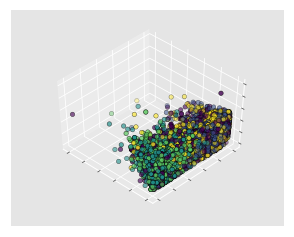

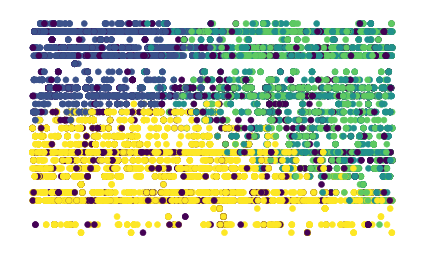

<Figure size 432x288 with 0 Axes>

In [20]:
kmeans.fit(data_transformed)
labels = kmeans.labels_

plot_clustering(data_transformed, labels)
plot_3d(data_transformed, labels)

plt.show()